In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter
pd.set_option('display.max_colwidth', None)

In [457]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from nltk import pos_tag

our_stopwords = set(stopwords.words('english'))
custom_stopwords = set(['bag', 'bad', 'but', 'the',
 'that',
 'senator',
 'think',
 'need',
 'american',
 'right',
 'would',
 'country',
 'one',
 'want',
 'make',
 'and',
 'president',
 'say',
 'go',
 'get',
 'people',  'every',
 'but',
 'let',
 'look',
 'america',
 'thing',
 'time',
 'you',
 'come',
 'like',
 'way',
 'talk',
 'take',
 'well',
 'know',
 'year', 'first', 'back', 
 'vice',
 'big',
 'happen',
 'much',
 'something',
 'tell',
 'actually',
 'ask',
 'start',
 'two',
 'many',
 'stage',
 'bring',
 'also',
 'day',
 'mayor',
 'what',
 'new',
 'they',
 'sure',
 'issue',
 'this',
 'put',
 'question',
 'fact',
 'see',
 'thank',
 'do', 'elect',
 'wrong',
 'political',
 'without',
 'forward',
 'continue',
 'kind',
 'break',
 'face',
 'member',
 'begin',
 'must',
 'across',
 'how',
 'long',
 'four',
 'ago',
 'show',
 'live',
 'now',
 'best',
 'still',
 'enough',
 'important',
 'because',
 'else',
 'term',
 'answer',
 'real',
 'different',
 'lose',
 'matter',
 'person',
 'never',
 'understand',
 'someone',
 'stop',
 'clear',
 'second',
 'create',
 'include',
 'next',
 'really',
 'whether',
 'great',
 'yes',
 'beat',
 'away',
 'worker',
 'keep',
 'agree',
 'biden',
 'kid',
 'idea',
 'move',
 'congress',
 'trade',
 'campaign',
 'house',
 'senate',
 'single',
 'three',
 'tonight',
 'dollar',
 'home',
 'voter',
 'drug',
 'place',
 'turn',
 'stand',
 'today',
 'black',
 'lead',
 'there',
 'warren',
 'election',
 'when',
 'cost',
 'health',
 'law',
 'party',
 'around',
 'mean',
 'use',
 'government',
 'justice',
 'mr',
 'good',
 'run',
 'republican',
 'all',
 'could',
 'gun',
 'economy',
 'call',
 'help',
 'life',
 'debate',
 'public',
 'school',
 'try',
 'point',
 'care',
 'child',
 'win',
 'bill',
 'system',
 'last',
 'everyone',
 'number',
 'part',
 'lot',
 'medicare',
 'even'])
our_stopwords = our_stopwords.union(custom_stopwords)
ps = WordNetLemmatizer()

In [425]:
data20 = pd.read_csv("debate_transcripts_v3_2020-02-26.csv")

In [426]:
data20['speaker'].loc[5890] = "Julian Castro"
data20['speaker'].loc[5891] = "Julian Castro"

/opt/anaconda3/envs/sarcasm/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [427]:
candidate_names = """Andrew Yang
John Delaney
Elizabeth Warren
Beto O’Rourke
Beto O'Rourke
Pete Buttigieg
Bernie Sanders
Steve Bullock
Michael Bennet
Amy Klobuchar
Kamala Harris
Tulsi Gabbard
Marriane Williamson
Julian Castro
Cory Booker
Joe Biden
Jay Inslee
John Hickenlooper
Tom Steyer
Michael Bloomberg
Eric Swalwell
Bill De Blasio
Kirsten Gillibrand
Seth Moulton
Tim Ryan"""
candidate_names = candidate_names.split("\n")
candidate_set = set(candidate_names)

In [428]:
candidates_bool = [True if i in candidate_set else False for i in data20['speaker']]

In [429]:
data20['speech'] = [re.sub(r' <[0-9]+> ', " ", s) for s in data20['speech']]
data20['speech'] = [re.sub(r'\[[\w :]+\]', " ", s) for s in data20['speech']]
temp = list(data20['speech']).copy()

last_cutoff = None
last_cutoff_spot = -10
last_cutoff_speaker = ""
no_goods = []
for i in range(len(data20['speech'])-1, -1, -1):
    if data20['speech'].iloc[i].startswith("…"):
        print(i)
        last_cutoff = data20['speech'].iloc[i]
        last_cutoff_speaker = data20['speaker'].iloc[i]
        for j in range(1,4):
            if last_cutoff_speaker == data20['speaker'].iloc[i-j]:
                if data20['speech'].iloc[i-j].endswith("-"):
                    data20['speech'].iloc[i-j] = data20['speech'].iloc[i-j] + last_cutoff
                    no_goods.append(i)
                break

# concatenate 2 if they are back to back with same speaker

5520
5514
5509
5507
5502
5501
5494
5488
5477
5472
5464
5439
5437
5421
5351
5345
5333
5241
5200
4929
4868
4863
4845
4728
4726
4712
4710
4706
4701
4690
4682
4671
4666
4654
4648
4638
4624
4622
4597
4579
4569
4559
4557
4550
4544
4527
4517
4512
4510
4508
4501
4495
4493
4488
4484
4387
4384
4362
4350
4345
4339
4331
4328
4244
4225
4113
4111
4104
4088
4070
4006
3988
3960
3899
3883
3864
3862
3860
3858
3803
3562
3560
3533
3529
3498
3495
3466
3441
3242
3122
3120
3112
3100
3089
3081
3079
3077
3063
3061
3052
3051
3041
3021
3005
2987
2986
2984
2977
2976
2964
2961
2959
2931
2920
2899
2894
2858
2854
2843
2841
2835
2833
2832
2830
2823
2821
2813
2805
2799
2773
2759
2751
2749
2731
2727
2589
2338
2243
2005
1879
1820
1755
1712
1693
1635
1633
1610
1575
1567
1499
1370
1369
1368
1148
1094
1092
1090
1089
1066
1065
1051
1042
1038
1024
1016
1010
1005
1002
1001
1000
999
994
992
989
976
765
764
726
683
655
457
291
280
271
261
260
258
133
131
125
117
109
100
98
95
93
86
82
80
78
62
58
50


In [430]:
data20 = data20[~data20.index.isin(no_goods)].reset_index(drop=True)

In [431]:
count = data20['speech'].str.split().apply(len)
words_left = []
words_left_sec = []
for i in range(3,25):
    temp = data20[count >= i]
    words_left.append(temp.shape[0])
    print(i)
    print(temp['speech'][10:20])
    print('')
    
    
    temp_secs = data20[data20['speaking_time_seconds'] >= i].shape[0]
    words_left_sec.append(temp_secs)

3
12                                                                   Look, the way I see this is that Bernie is winning right now because the Democratic Party is a progressive party and progressive ideas are popular ideas. Even if there are a lot of people on this stage who don’t want to say so. But Bernie and I agree on a lot of things, but I think I would make a better president than Bernie. And the reason for that is that getting a progressive agenda enacted is going to be really hard and it’s going to take someone who digs into the details to make it happen. Bernie and I both wanted to help reign in Wall Street. In 2008, we both got our chance, but I dug in, I fought the big banks, I built the coalitions and I won. Bernie and I both want to see universal healthcare, but Bernie’s plan doesn’t explain how to get there, doesn’t show how we’re going to get enough allies into it and doesn’t show enough about how we’re going to pay for it.
13                                            

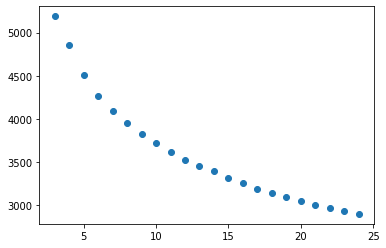

In [432]:
plt.scatter([i for i in range(3,25)], words_left)
plt.show()

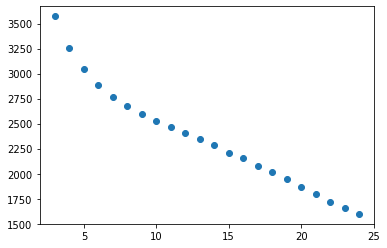

In [433]:
plt.scatter([i for i in range(3,25)], words_left_sec)
plt.show()

In [434]:
temp_short = data20[count < 12]

In [435]:
temp_long = data20[count >= 12]

# 4.5% of the samples contained information we would want to keep

In [487]:
def custom_lemmatize(words):
    for word, tag in pos_tag([words]):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        if not wntag:
            lemma = word
        else:
            lemma = ps.lemmatize(word, wntag)
    return lemma

def extract_words(sentence):
    ignore_words = our_stopwords
    words = nltk.word_tokenize(sentence)
    words_cleaned = [custom_lemmatize(''.join(filter(str.isalpha, w)).lower()) for w in words if (w not in ignore_words and not any(map(str.isdigit, w)) and len(w)>2)]
    return words_cleaned  


def tokenize_sentences(sentences):
    words = []
    for sentence in sentences:
        w = extract_words(sentence)
        words.extend(w)
        
    counts = dict(Counter(words))
    return counts


def bagofwords(sentence, words):
    sentence_words = extract_words(sentence)
    # frequency word count
    bag = np.zeros(len(words))
    for sw in sentence_words:
        for i,word in enumerate(words):
            if word == sw: 
                bag[i] += 1
                
    return np.array(bag)

In [488]:
counts = tokenize_sentences(temp_long.speech)

In [489]:
values = list(counts.values())
vocab = list(counts.keys())
values, vocab = zip(*sorted(zip(values, vocab)))

In [490]:
vocab

('aapi',
 'aaron',
 'abate',
 'abide',
 'abolition',
 'abominable',
 'abraham',
 'absent',
 'abundantly',
 'abusive',
 'academic',
 'academically',
 'academy',
 'acceptable',
 'accepted',
 'accomplishment',
 'accountant',
 'accrue',
 'achieves',
 'acknowledgement',
 'actionable',
 'actualize',
 'addictive',
 'addictiveness',
 'adequately',
 'admission',
 'advancement',
 'advertisement',
 'affected',
 'affiliate',
 'affirm',
 'affirmatively',
 'affirms',
 'agribusiness',
 'aide',
 'ail',
 'aim',
 'ain',
 'airbase',
 'aircraft',
 'airlift',
 'alert',
 'alfaw',
 'allegation',
 'allen',
 'allergic',
 'alleviate',
 'allornothing',
 'allout',
 'allowable',
 'alltime',
 'allure',
 'almighty',
 'alnusra',
 'aloft',
 'alum',
 'aluminum',
 'ambulance',
 'ame',
 'amends',
 'americacom',
 'amok',
 'amoral',
 'amuck',
 'an',
 'ana',
 'analyze',
 'anarchy',
 'andor',
 'anemic',
 'angelou',
 'anger',
 'announces',
 'annoys',
 'annual',
 'antagonize',
 'anthem',
 'antiabortion',
 'antichoice',
 'antic

In [440]:
bow_representation = [bagofwords(i, vocabulary) for i in temp_long['speech']]

KeyboardInterrupt: 

In [373]:
temp_long['bow_representation'] = bow_representation

In [513]:
vocab_plus_counts = pd.DataFrame({"vocab": vocab, "counts": values})
vocab_plus_counts = vocab_plus_counts[vocab_plus_counts['counts'] > 2]
vocab_plus_counts.to_csv("vocab.csv")

In [499]:
for i in range(vocab_plus_counts.shape[0]):
    print(str(vocab_plus_counts['vocab'].iloc[i]) + "    " + str(vocab_plus_counts['counts'].iloc[i]))

abolish    3
abrams    3
absurd    3
absurdity    3
accumulate    3
acknowledges    3
acquit    3
activate    3
adam    3
adjust    3
affiliation    3
aflcio    3
airport    3
alassad    3
alberta    3
alcoholism    3
alzheimer    3
amend    3
amna    3
amongst    3
analysis    3
analyst    3
angry    3
ank    3
anniversary    3
appear    3
appreciation    3
architect    3
aspect    3
assassinate    3
assassination    3
assistance    3
authentic    3
authorize    3
autistic    3
automatic    3
autopsy    3
avenue    3
aware    3
backup    3
bailout    3
beijing    3
betray    3
betrayal    3
bin    3
birth    3
blackwhite    3
blanket    3
blast    3
blowing    3
boldest    3
boldness    3
bomb    3
both    3
bother    3
brain    3
branch    3
brazil    3
breakdown    3
brett    3
brief    3
briefing    3
bright    3
broaden    3
broader    3
broward    3
buddy    3
bully    3
burn    3
businessman    3
cabinet    3
candid    3
capitalist    3
careful    3
carpenter    3
cartel    3
ca

dominate    10
dozen    10
eat    10
enforce    10
entrepreneurship    10
era    10
establish    10
exchange    10
fewer    10
firm    10
function    10
gang    10
gay    10
grade    10
graduate    10
grandchild    10
historically    10
hook    10
household    10
ice    10
ideal    10
incarceration    10
incentive    10
incredible    10
instance    10
interrupt    10
key    10
latin    10
longest    10
mark    10
mccain    10
mexican    10
muslim    10
native    10
neutral    10
northern    10
oath    10
offering    10
out    10
overall    10
partisan    10
politically    10
possession    10
pro    10
reflect    10
related    10
rely    10
review    10
richer    10
richest    10
rip    10
row    10
san    10
sanction    10
separation    10
seriously    10
size    10
skin    10
southern    10
staff    10
stock    10
suck    10
their    10
threaten    10
toward    10
trail    10
train    10
uniform    10
unites    10
unlike    10
unprecedented    10
virtually    10
abroad    11
achieve  

In [512]:
list(vocab_plus_counts['vocab'])[-252:-100]

['elect',
 'student',
 'top',
 'wrong',
 'bernie',
 'political',
 'without',
 'ally',
 'court',
 'forward',
 'industry',
 'value',
 'wealth',
 'continue',
 'kind',
 'administration',
 'break',
 'buttigieg',
 'corporation',
 'face',
 'member',
 'begin',
 'border',
 'military',
 'must',
 'across',
 'power',
 'race',
 'how',
 'leader',
 'long',
 'national',
 'respond',
 'four',
 'ago',
 'business',
 'experience',
 'show',
 'education',
 'crisis',
 'live',
 'now',
 'best',
 'still',
 'enough',
 'important',
 'reason',
 'because',
 'else',
 'nation',
 'build',
 'weapon',
 'middle',
 'obama',
 'term',
 'answer',
 'real',
 'troop',
 'different',
 'lose',
 'matter',
 'person',
 'never',
 'act',
 'understand',
 'someone',
 'stop',
 'clear',
 'white',
 'second',
 'create',
 'city',
 'everybody',
 'include',
 'next',
 'really',
 'billion',
 'whether',
 'china',
 'college',
 'raise',
 'great',
 'washington',
 'yes',
 'beat',
 'away',
 'worker',
 'keep',
 'agree',
 'biden',
 'kid',
 'idea',
 'move'